In [1]:
import os
import cv2
from FaceRecognitionSystem import FaceRecognitionSystem
fr = FaceRecognitionSystem()

In [2]:
import numpy as np
known, names = fr.getEmbeddingsList()
known = np.array(known)
names = [fr.db[name] for name in names]

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(names)
labels_encoded = list(le.transform(names))

In [4]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X = known
y = labels_encoded

target_names = names

#nsamples, nx, ny = X.shape
#X_2D = X.reshape((nsamples,nx*ny))


#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_2D)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [5]:
print(X.shape)
print(y.shape)


(45, 2622)


AttributeError: 'list' object has no attribute 'shape'

In [9]:
n_components = 3
X_pca = PCA(n_components=n_components).fit_transform(X)
 
# apply PCA transformation
#X_train_pca = pca.transform(X_scaled)
#X_test_pca = pca.transform(X_test)

<Figure size 432x288 with 0 Axes>

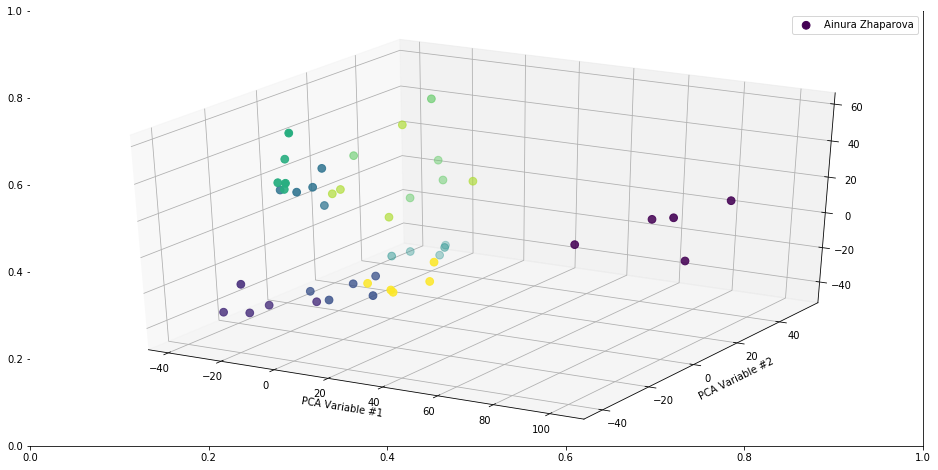

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig, ax = plt.subplots(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the compressed data points
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, s=60)
#ax.view_init(30, 185)
ax.set_xlabel('PCA Variable #1')
ax.set_ylabel('PCA Variable #2')



ax.legend(target_names)
#ax.set_zlabel('PCA Variable #2')
#plt.savefig('pca 3d colored.png')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=2, verbose=True, early_stopping=True).fit(X_train, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 11.43246592
Validation score: 0.750000
Iteration 2, loss = 0.74526950
Validation score: 1.000000
Iteration 3, loss = 0.60316388
Validation score: 1.000000
Iteration 4, loss = 0.03570096
Validation score: 1.000000
Iteration 5, loss = 0.03568696
Validation score: 1.000000
Iteration 6, loss = 0.03564129
Validation score: 1.000000
Iteration 7, loss = 0.03558978
Validation score: 1.000000
Iteration 8, loss = 0.03553778
Validation score: 1.000000
Iteration 9, loss = 0.03548604
Validation score: 1.000000
Iteration 10, loss = 0.03543418
Validation score: 1.000000
Iteration 11, loss = 0.03538152
Validation score: 1.000000
Iteration 12, loss = 0.03532983
Validation score: 1.000000
Iteration 13, loss = 0.03527842
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [18]:
y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=target_names))

In [19]:
y_test

[0, 2, 6, 2, 1, 3, 2, 3, 8]

In [20]:
y_pred

array([0, 2, 6, 2, 8, 3, 2, 3, 8])